In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('application_train.csv')

data.head()
print(data)

data.info()
data.describe()




        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0     

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


<Axes: >

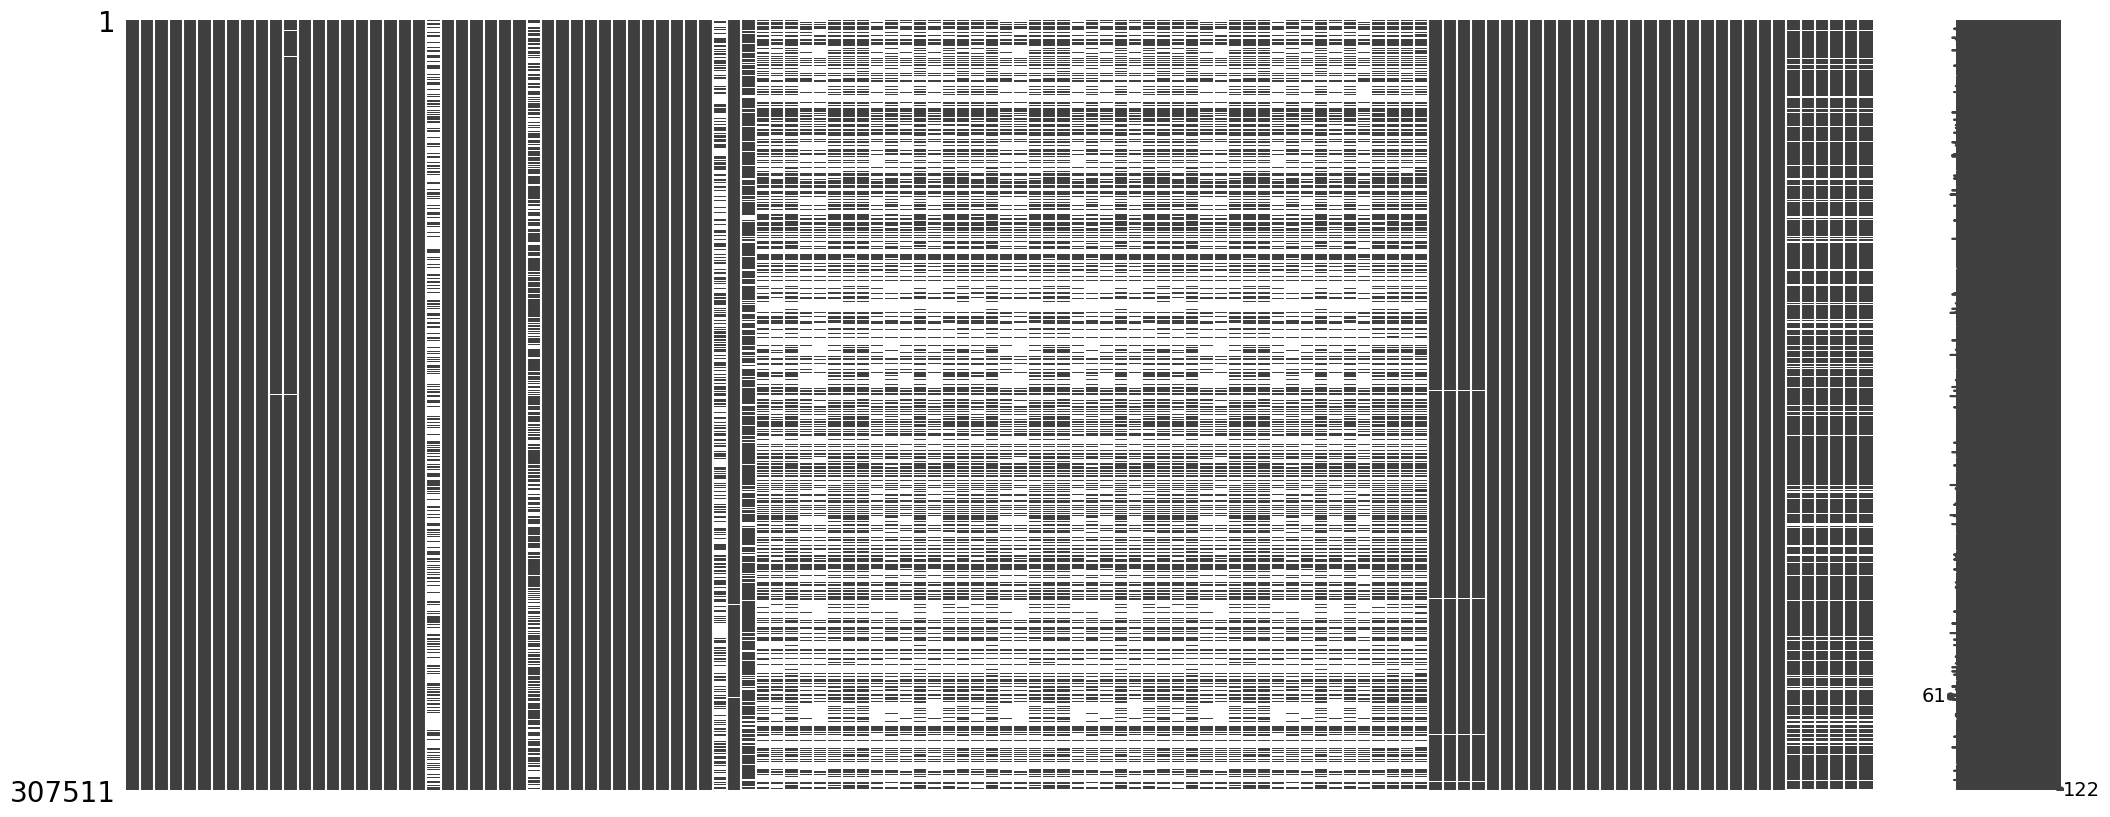

In [48]:
import missingno as msno
msno.matrix(data)


In [27]:
missing_ratio = data.isnull().sum() / len(data)
missing_ratio[missing_ratio > 0].sort_values(ascending=False)


COMMONAREA_AVG              0.687161
COMMONAREA_MODE             0.687161
COMMONAREA_MEDI             0.687161
NONLIVINGAPARTMENTS_AVG     0.684125
NONLIVINGAPARTMENTS_MODE    0.684125
                              ...   
OBS_30_CNT_SOCIAL_CIRCLE    0.000595
OBS_60_CNT_SOCIAL_CIRCLE    0.000595
DEF_60_CNT_SOCIAL_CIRCLE    0.000595
AMT_ANNUITY                 0.000492
EXT_SOURCE_2                0.000164
Length: 64, dtype: float64

In [40]:
threshold = 0.4
cols_to_drop = missing_ratio[missing_ratio > threshold].index
df = data.drop(columns=cols_to_drop)
df = df.dropna()

df.isnull().sum().sum()  # Should return 0 if there are no more missing values



np.int64(0)

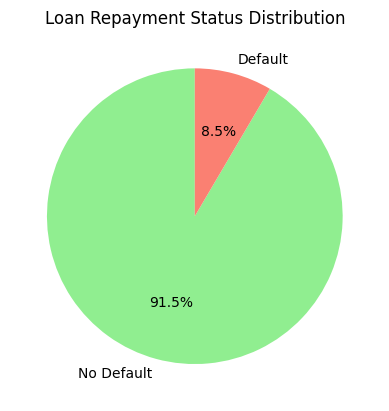

In [43]:
import matplotlib.pyplot as plt

df['TARGET'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'salmon'],
    labels=['No Default', 'Default']
)
plt.title('Loan Repayment Status Distribution')
plt.ylabel('')
plt.show()


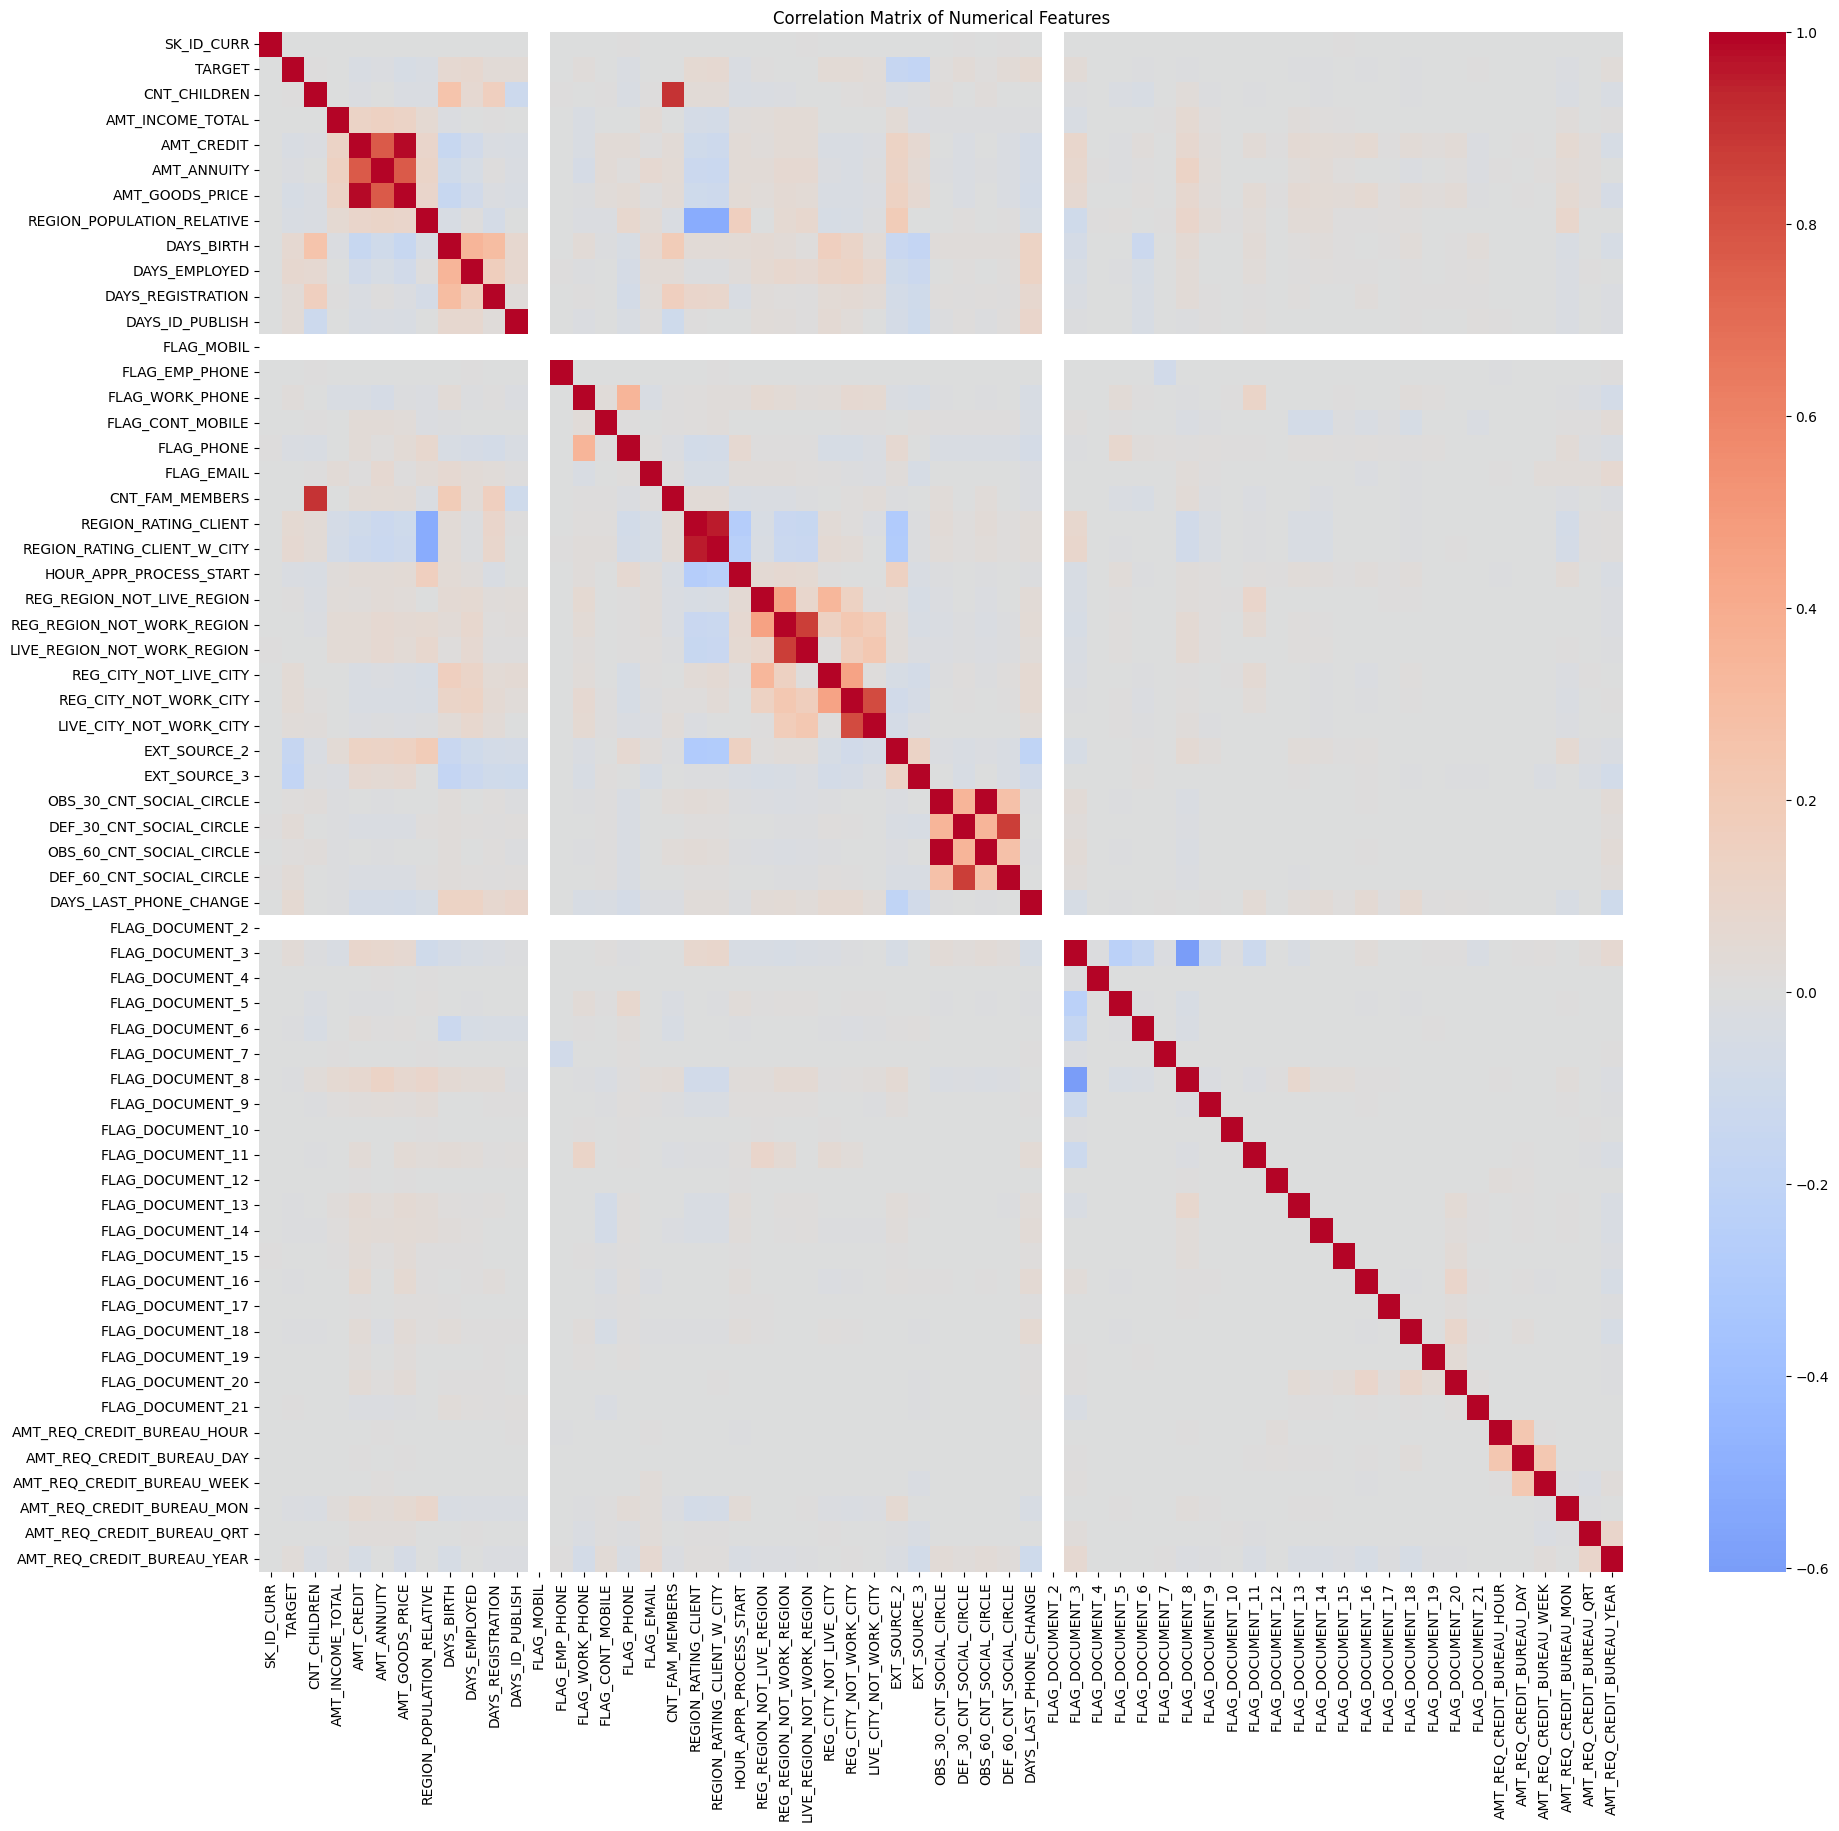

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only
numeric_df = df.select_dtypes(include='number')

# Compute correlation
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(22, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


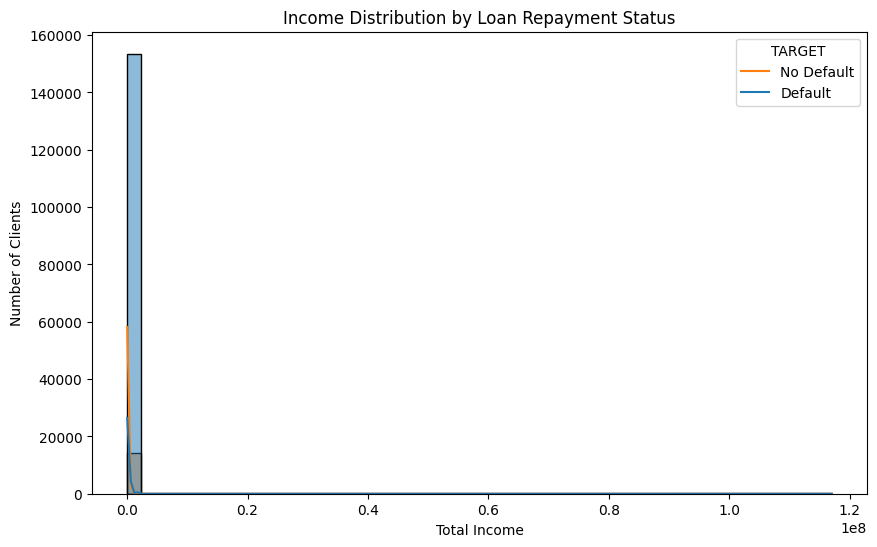

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AMT_INCOME_TOTAL', hue='TARGET', bins=50, kde=True)
plt.title('Income Distribution by Loan Repayment Status')
plt.xlabel('Total Income')
plt.ylabel('Number of Clients')
plt.legend(title='TARGET', labels=['No Default', 'Default'])
plt.show()

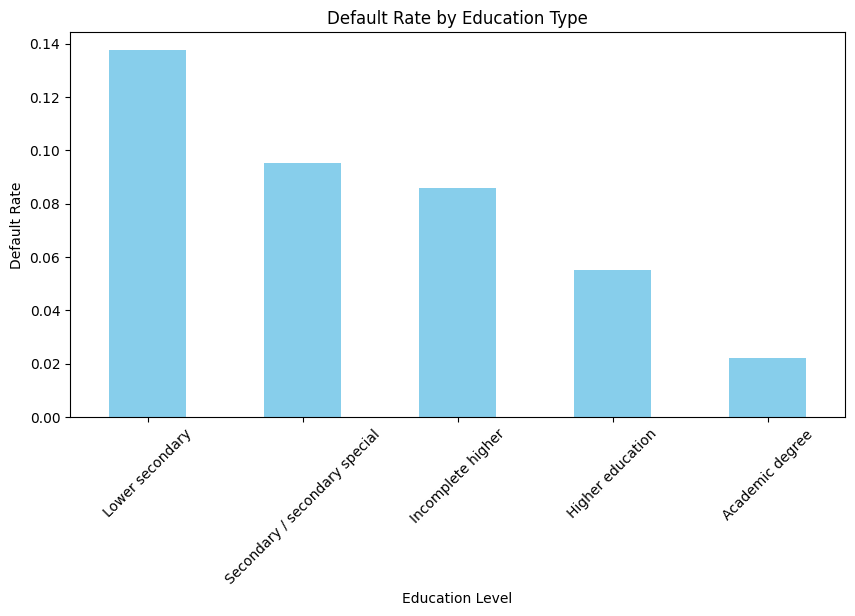

In [46]:
edu_default = df.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
edu_default.plot(kind='bar', color='skyblue')
plt.title('Default Rate by Education Type')
plt.ylabel('Default Rate')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.show()


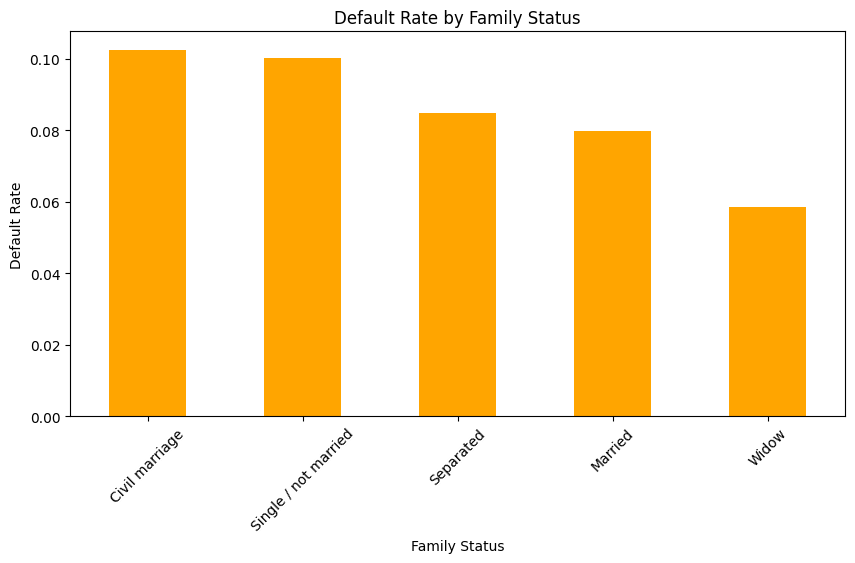

In [47]:
fam_default = df.groupby('NAME_FAMILY_STATUS')['TARGET'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
fam_default.plot(kind='bar', color='orange')
plt.title('Default Rate by Family Status')
plt.ylabel('Default Rate')
plt.xlabel('Family Status')
plt.xticks(rotation=45)
plt.show()
